Link do notatnika: https://colab.research.google.com/drive/1rNb1b2cNAiaR9PATnTPWS9XEOVEtQV5P?usp=sharing

---


# Wstęp

Zadanie nr 13 wprowadza zagadnienie głębokich modeli uczenia ze wzmocnieniem (*Deep Reinforcement Learning*, **DRL**) - modeli, które uczone są przez interakcję z otoczeniem, obserwując konsekwencję działań oraz przyznawaną wartość nagrody.

## Cel ćwiczenia

Celem ćwiczenia jest zapoznanie z:
* koncepcją głębokiego uczenia ze wzmocnieniem,
* podstawowymi podejściami w głębokim uczeniu ze wzmocnieniem,
* przykładowymi środowiskami, wykorzystywanym w DRL,
* jedną z podstawowych metod DRL opartą na funkcji wartości.


# Głębokie uczenie ze wzmocnieniem

Podstawa reinforcement learning jest uczenie przez interakcje ̨: agent oddziałuje z otoczeniem i, obserwując konsekwencje jego działań, może uczyć się jak zmienić swoje zachowanie by zmaksymalizować wartość otrzymanej nagrody.

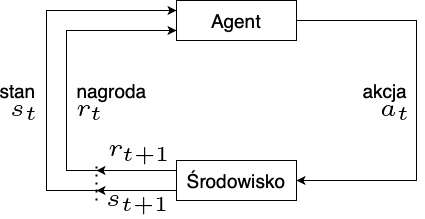

Zasada działania modelu uczenia ze wzmocnieniem jest następująca: autonomiczny agent, sterowany przez model, obserwuje **stan $s_t$ środowiska** w kroku czasowym $t$. Agent oddziałuje z otoczeniem podejmując **akcję $a_t$**, co powoduje przejście otoczenia i agenta do nowego stanu $s_{t+1}$. Przejście to odbywa się na podstawie **funkcji przejścia stanów $T(s_{t+1} | s_t, a_t)$** (równoważnej środowisku) - na podstawie aktualnego stanu i podjętej akcji. Zakładamy, że informacja o stanie jest wystarczająca dla agenta do podjęcia optymalnej akcji.

Sekwencja akcji wybierana jest na podstawie nagrody, przyznawanej przez otoczenie agentowi. Każde przejście środowiska do nowego stanu powoduje nagrodzenie agenta **nagrodą $r_t$**, tj. wartością skalarną, określającą "poprawność" podjętej decyzji. Celem uczenia modelu DRL jest wyuczenie **strategii**, maksymalizującej łączną uzyskiwaną wartość nagrody (*zwrot*).

Agent uczenia ze wzmocnieniem może składać się z następujących elementów (w zależności od stosowanego podejścia zawiera jeden lub więcej z nich):
* **strategia** (ang. *policy*), tj. funkcja zachowywania się agenta; może być deterministyczna $a = \pi(s)$ lub stochastyczna $\pi(a|s)=p(a_t=a | s_t=s)$;
* **funkcja wartości** (ang. *value function*), tj. funkcja służąca do predykcji przyszłej nagrody, używana do oceny stanów przy podejmowaniu akcji:
$$V_{\pi}(s)=\mathbb{E}\left[r_{t+1}+\gamma r_{t+2}+\gamma^2 r_{t+3}+\dots | s_t=s\right],$$
gdzie $\gamma\in[0, 1]$ to współczynnik dyskontowania, określający, w jakim stopniu faworyzowane są nagrody natychmiastowe;
* **model**, służący do predykcji zmian w środowisku:
$$\mathcal{P}_{ss'}^a = p(s_{t+1}=s | s_t=s, a_t=a),$$
$$\mathcal{R}_s^a = \mathbb{E}[r_{t+1} | s_t=s, a_t=a],$$
gdzie $\mathcal{P}$ przewiduje kolejny krok, a $\mathcal{R}$ wskazuje następną wartość nagrody.

W zależności od elementów metody uczenia ze wzmocnieniem dzielimy na:
* oparte na funkcji wartości (bez strategii) - trenujemy model aby poprawnie oceniał wartość nagrody za każdą z możliwych podejmowanych akcji,
* oparte na strategii (bez funkcji wartości) - *policy gradient* - trenujemy model strategii, która bezpośrednio zwraca akcje, maksymalizujące wartość nagrody,
* aktor-krytyk (wykorzystujące strategię oraz funkcję wartości) - połączenie powyższych (aktor to model strategii, kontrolujący zachowanie agenta, a krytyk to model funkcji wartości, oceniająca akcje podejmowane przez krytyka).

Każda z tych metod może być też *model-free* (bez wykorzystania modelu środowiska) lub *model-based* (modelująca środowisko).

W tym zadaniu skupimy się na **podejściu *model-free* opartym na funkcji wartości**.


## Funkcje wartości

Podejścia wykorzystujące funkcje wartości to metody oparte na estymowaniu wartości zwrotu (całkowitej nagrody). Wartość ta może być estymowana wyłącznie na podstawie aktualnego stanu - wówczas mówimy o **funkcji stan-wartość** $V^\pi(s) = \mathbb{E}[R | s, \pi]$, która ocenia wartość nagrody przy założeniu postępowania od danego stanu zgodnie ze strategią $\pi$. W idealnej sytuacji, optymalna strategia mogłaby być wybierana na podstawie akcji maksymalizujących oczekiwaną wartość nagrody; niestety jednak funkcja przejścia stanów $T(s_{t+1} | s_t, a_t)$ nie jest znana agentowi.

Rozwiązaniem jest konstrukcja funkcji, która będzie estymowała wartość zwrot na podstawie stanu oraz podejmowanej akcji - **funkcja jakości** $Q^\pi(s, a) = \mathbb{E}[R | s, a, \pi]$ - tu oceniana jest wartość zwrotu po podjęciu danej akcji w danym stanie, przy postępowaniu dalej zgodnie ze strategią $\pi$. Wówczas, najlepsza strategia może być znaleziona przez zachłanny wybór akcji maksymalizującej wartość funkcji $Q$: $\arg\max_a Q^\pi(s, a)$, w ten sposób definiując aproksymację poszukiwanej funkcji wartości na podstawie maksymalizowania funkcji jakości:

$$V^\pi(s) \approx \max_a Q^\pi(s, a).$$

W takim podejściu skupiamy się na eksploatacji aktualnie wykrytego maksimum; często jednak chcielibyśmy również eksplorować rozwiązania alternatywne, na co pozwala strategia $\epsilon$-zachłanna (z prawdopodobieństwem $1-\epsilon$ wybieramy maksymalizującą akcję, a z prawdopodobieństwem $\epsilon$ - losową).

Wartość funkcji jakości może być obliczona ze wzoru rekurencyjnego:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma Q^\pi\left(s_{t+1}, \pi(s_{t+1})\right)\right],$$

mówimy wówczas o podejściu *on-policy* - do estymacji całkowitej wartości zwrotu i wyboru akcji wykorzystuje się aktualną postać strategii (np. algorytm [SARSA](https://en.wikipedia.org/wiki/State–action–reward–state–action)). Alternatywnie, wybór akcji i estymacja wartości zwrotu może odbywać się poprzez zachłanny wybór akcji maksymalizującej wartość nagrody - mówimy wtedy o algorytmach *off-policy*:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right)\right].$$

Przykładem drugiej z grup metod jest [Q-learning](https://en.wikipedia.org/wiki/Q-learning). Polega on na budowaniu tabeli pamięci $Q[s, a]$, mającej przechowywać wartości funkcji jakości dla wszystkich możliwych kombinacji stanów $s$ i akcji $a$. Powstaje ona na skutek iteracyjnego próbkowania akcji z bieżącego stanu i zapisywania wartości zwrotu ($Y$), przy dalszym podejmowaniu akcji maksymalizujących wartość uzyskiwanej nagrody. Algorytm powtarzany jest iteracyjnie dla wszystkich możliwych akcji w danym stanie, po czym następuje przejście do kolejnego, niezbadanego stanu. W wytrenowanym modelu tabela ta wykorzystywana jest do wyboru akcji, maksymalizując wartość uzyskiwanej funkcji nagrody.


## Deep Q-Learning (DQL)

Algorytm Q-learning jest słabo skalowalny — w szczególności pod względem wymagań pamięciowych oraz złożoności obliczeniowej dla dużych przestrzeni stanów i akcji, dlatego też w DQN tabela pamięci została zastąpiona przez sieć głęboką (ang. *Deep Q-Network*), której zadaniem jest aproksymacja funkcji jakości $Q(s, a)$.

Uczenie tej sieci odbywa się np. z użyciem funkcji celu - błędu średniokwadratowego między predykcją sieci a końcowymi wartościami zwrotu

$$\mathcal{L} = \mathbb{E}\left[\left(r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right) - Q^\pi\left(s_t, a_t\right)\right)^2\right].$$

Można także użyć [Huber loss](https://en.wikipedia.org/wiki/Huber_loss).

Algorytm uczenia tej sieci przedstawiony został poniżej:

```{tidy=FALSE, eval=FALSE}
Get(s);                                         // pobierz stan początkowy
for step <- 1, 2, ... till convergence do       // dla kolejnych kroków
    Sample(a);                                  // wybierz akcję (epsilon-zachłannie)
    Get(s');                                    // ustal nowy stan
    if s' is terminal then                      // jeżeli nowy stan jest stanem końcowym
        Y <- sum(r);                            // ustal wartość zwrotu
        Sample(new s');                         // pobierz nowy stan początkowy
    else:
        Y <- r + gamma * Q_step(s', a')'        // aktualizuj estymację zwrotu
    theta_k+1 <- theta - alpha * grad L(theta); // aktualizuj wagi zgodnie z funkcją celu
    s <- s';                                    // weź nowy stan jako aktualny
```

Wybrane ulepszenia:

- **Zmienna wartość $\epsilon$**.
    Zastosowanie stałej wartości $\epsilon$ w strategii $\epsilon$-zachłannej nie jest najlepszym rozwiązaniem. Zwykle wolelibyśmy, żeby w początkowym etapie model bardziej eksplorował przestrzeń (wyższy $\epsilon$), a w późniejszym etapie by eksploatował znalezione optimum (niższy $\epsilon$). Często stosuje się w tym celu funkcję wykładniczą.

- ***Target network***.
    Stosowane w celu poprawy stabilności trenowania. Polega ono na wykorzystaniu odrębnych instancji do działania w środowisku (*target network*) i odrębnej do trenowania w każdej iteracji (*policy network*). Początkowo, obie sieci są swoimi kopiami, a ich wagi są synchronizowane w trakcie trenowania w określonych interwałach. Algorytm trenowania modelu z *target network* prezentuje się następująco:

    1. Wykonaj kopię modelu (*target network*)
    1. Dla każdego kroku:
        - wykonuj akcję w środowisku z użyciem *policy network* i zapisz czwórkę [stan, akcja, następny stan, nagroda] do utworzenia mini-batcha
        - oblicz oczekiwane wartości funkcji Q używając *target network*
        - oblicz loss i wykonaj propagację wsteczną w *policy network*
    1. Cyklicznie synchronizuj wytrenowane wagi w *policy network* -> *target network*

- ***Experience replay***.
    Podobnie jak *target network* stosowane w celu poprawy stabilności trenowania. Polega ono na zapisywaniu czwórek: stan, akcja, kolejny stan i nagroda $(s_t, a_t, s_{t+1}, r_t)$ w pamięci o ograniczonej wielkości (*experience*). W celu uczenia modelu próbkujemy losowo mini-batch z *experience* i wykorzystujemy do trenowania. W ten sposób model uczony jest na danych niezależnych od siebie, poprawiając stabilność trenowania.

    Wykorzystując *experience replay* algorytm trenowania będzie wyglądał następująco:

    1. Zbuduj pamięć *experience* wykonując akcje niewytrenowanym modelem w środowisku i zapisując czwórki.
    1. Dla każdego kroku uczenia:
        - wykonaj akcję (1 lub więcej) w środowisku i zapisz w pamięci, usuwając najstarszy experience
        - próbkuj batch z experience losowo i wykorzystaj do trenowania modelu (trenowanie odbywa się analogicznie jak wcześniej)


### Uwaga ogólna

Modele DRL, szczególnie w najbardziej "podstawowych" formach są niestabilne przy trenowaniu, dlatego też stosuje się wiele ulepszeń. Ponadto każdy błąd implementacyjny może mieć bardzo duży wpływ na zdolność modelu do wytrenowania, dlatego też w tych listach będziemy się opierać na gotowych implementacjach z biblioteki [**Stable-Baselines3**](https://stable-baselines.readthedocs.io). Opiera się ona na PyTorchu i zawiera sprawdzone i przetestowane implementacje wielu popularnych metod głębokiego uczenia ze wzmocnieniem. W tym laboratorium skupimy się na wspomnianej wcześniej metodzie Deep Q-Learning.


## Środowisko

W laboratorium będziemy wykorzystali bibliotekę [Gym](https://gym.openai.com) - zestaw narzędzi do budowy i porównywania algorytmów uczenia ze wzmocnieniem. Zawiera ona środowiska o różnym poziomie złożoności - zaczniemy od prostego środowiska - [CartPole](https://gym.openai.com/envs/CartPole-v1/)

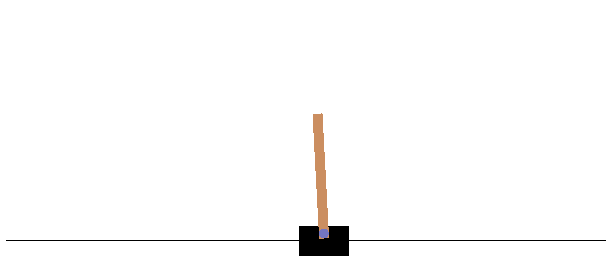
> oparte na: Barto, Sutton & Anderson *Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem*, 1983

Słupek zamocowany jest do wózka, który porusza się bez tarcia po ścieżce. Przestrzeń stanów jest czteroelementowa:
* pozycja wózka,
* szybkość wózka,
* kąt nachylenia słupka,
* szybkość obrotu słupka.

Możemy kontrolować ruch wózka przykładając do niego siłę +1 lub -1. Celem jest zapobieganie przewróceniu słupka. Nagroda +1 przyznawana jest za każdy krok, kiedy słupek pozostaje pionowo. Epizod kończy się, gdy słupek odchylony jest o więcej niż 15 stopni od pionu, lub gry wózek odsunie się o ponad 2,4 jednostki od środka.


In [ ]:
!apt-get install -y xvfb python-opengl
!pip install gym pyvirtualdisplay

In [ ]:
!pip install "stable_baselines3[extra]>=2.0.0a9"

In [ ]:
import os
import random

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation
from pyvirtualdisplay import Display
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import plot_results, load_results
from stable_baselines3.dqn.policies import MlpPolicy
import gymnasium

from IPython import display as ipythondisplay


SEED = 13
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

DISPLAY = Display(visible=0, size=(400, 300))
DISPLAY.start()


/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


Metoda Deep Q-Learning wraz z wymienionymi wcześniej ulepszeniami jest już zaimplementowana w bibliotece Stable-Baselines3. Najpierw sprawdźmy hiperparametry, jakie możemy podać do modelu:


In [ ]:
help(DQN)

Kluczowym argumentem podawanym do modelu jest `policy`, czyli model strategii wykorzystywany w modelu. W Stable-Baselines3 każda metoda DRL posiada własny zestaw strategii - w przypadku DQN dostępne są trzy wersje (moduł `stable_baselines3.dqn.policies`:
- `MlpPolicy` - w pełni połączona
- `CnnPolicy` - z warstwami konwolucyjnymi
- `MultiInputPolicy` - dla środowisk, które umożliwiają obserwacje w formie obrazów jak i wartości.

W tym przykładzie będziemy wykorzystywać `MlpPolicy`, ponieważ środowisko nie zwraca obserwacji w formie obrazów. Sprawdźmy zatem, jakie argumenty ona przyjmuje (mogą one być przekazywane przez argument modelu `policy_kwargs`).


In [ ]:
help(MlpPolicy)

Szczególnie interesującym będzie dla nas argument `net_arch`, definiujący architekturę modelu strategii (jest to lista integerów, opisująca liczbę neuronów w poszczególnych warstwach ukrytych).


Deklarujemy funkcję do wyświetlania działania modelu. Poza tworzeniem animacji wykonuje ona również ewaluację modelu, sprawdzając w 100 epizodach osiąganą całkowitą wartość zwrotu.

Sprawdzimy od razu, jak zachowuje się niewytrenowany (losowy) model (zwróćmy uwagę, że musimy podać model strategii, jak i środowisko, w jakim model ma działać - możemy uzyskać do niego dostęp wywołując metodę modelu `get_env`).


In [ ]:
def visualize_model(model, max_steps=300):
    """Show how a model works in the environment."""
    env = model.get_env()
    obs = env.reset()


    fig, ax = plt.subplots()
    frames = []
    done = False

    while not done:
        frames.append(env.render())
        with torch.no_grad():
            action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        if len(frames) >= max_steps:
            break

    anim = animation.FuncAnimation(
        fig=fig,
        func=lambda i: ax.imshow(frames[i]),
        frames=range(len(frames)),
        interval=100,
        blit=False,
    )
    plt.close()

    reward_avg, reward_std = evaluate_policy(model, env, n_eval_episodes=100)
    print(f"Reward in episode: {reward_avg:.2f} +/- {reward_std:.2f}")

    return anim.to_jshtml()


env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
model = DQN(MlpPolicy, env)
display(ipythondisplay.HTML(visualize_model(model)))


Reward in episode: 9.30 +/- 0.75


Zaczniemy od deklaracji uproszczonego modelu, ze stałą wartością $\epsilon$, bez target network oraz z experience replay o długości batcha (efektywnie - brakiem experience replay). Następnie będziemy chcieli włączać ulepszenia oraz stroić hiperparametry aby sprawdzić, jak wpływają one na działanie modelu. Do wytrenowania modelu służy metoda `learn`. Sprawdźmy jej parametry.


In [ ]:
help(DQN.learn)

Help on function learn in module stable_baselines3.dqn.dqn:

learn(self: ~SelfDQN, total_timesteps: int, callback: Union[NoneType, Callable, List[stable_baselines3.common.callbacks.BaseCallback], stable_baselines3.common.callbacks.BaseCallback] = None, log_interval: int = 4, tb_log_name: str = 'DQN', reset_num_timesteps: bool = True, progress_bar: bool = False) -> ~SelfDQN
    Return a trained model.
    
    :param total_timesteps: The total number of samples (env steps) to train on
    :param callback: callback(s) called at every step with state of the algorithm.
    :param log_interval: The number of episodes before logging.
    :param tb_log_name: the name of the run for TensorBoard logging
    :param reset_num_timesteps: whether or not to reset the current timestep number (used in logging)
    :param progress_bar: Display a progress bar using tqdm and rich.
    :return: the trained model



Z punktu widzenia analizy działania modelu potrzebna jest jedynie liczba kroków uczenia `total_timesteps`. Możemy też wyregulować częstość ewaluacji oraz logowania (wyświetlanie logu odbywa się jedynie przy ustawieniu `verbose=1`). Oprócz tego chcielibyśmy jednak także wyświetlić krzywą uczenia. Wykorzystujemy w tym celu wrapper na środowisko w Unity `Monitor`. Jako parametry przyjmuje on środowisko, które będziemy monitorować, oraz folder, w którym będziemy zapisywać logi. Możemy je potem wczytać i wyświetlić wykorzystując metody `load_results` i `plot_results`.


In [ ]:
RESULTS_DIR = "/tmp/"

env = Monitor(env, filename=RESULTS_DIR)


Deklarujemy model. Ustawiając rozmiar bufora oraz start i częstość trenowania równe wielkości mini-batcha efektywnie wyłączamy experience replay, a aktualizując sieć w interwale równym wielkości batcha model trenowany będzie bez *target network*. Ponadto, dobieramy odpowiednio wartości schedulera $\epsilon$, tak, aby współczynnik ten był stały podczas trenowania.


In [ ]:
batch_size = 64
lr = 1e-4
gamma = 0.8
eps = 0.1

env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
log_dir = "/tmp/vanilla/"
os.makedirs(log_dir, exist_ok=True)  # we have to create this dir - it does not exist
env = Monitor(env, filename=log_dir)

vanilla_dqn = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    buffer_size=batch_size, learning_starts=batch_size, train_freq=batch_size,  # disable experience replay
    target_update_interval=batch_size,  # disable target network
    exploration_fraction=1, exploration_initial_eps=eps, exploration_final_eps=eps,  # disable epsilon scheduling
    verbose=1,  # show information throughout training
)


Using cpu device
Wrapping the env in a DummyVecEnv.


Wytrenujmy zatem taki prosty model w 100 000 kroków i sprawdźmy jakie osiągnie on po tym czasie rezultaty.


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
|    n_updates        | 1332     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8648     |
|    fps              | 1374     |
|    time_elapsed     | 62       |
|    total_timesteps  | 85389    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0797   |
|    n_updates        | 1333     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8652     |
|    fps              | 1374     |
|    time_elapsed     | 62       |
|    total_timesteps  | 8

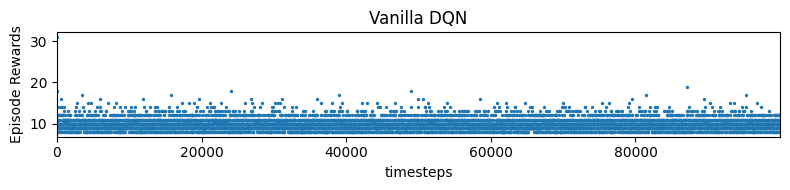

In [ ]:
total_timesteps = 100000

vanilla_dqn.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(vanilla_dqn)))
plot_results([log_dir], total_timesteps, "timesteps", "Vanilla DQN")


Jak widać, metoda Deep Q-Learning w domyślnym ustawieniu nie działa zbyt dobrze - model nie zbiega, oscylując wokół początkowych wartości nagrody. Być może strojenie hiperparametrów poprawiłoby osiągane rezultaty?

Sprawdźmy, jaka była maksymalna wartość zgromadzona w trakcie uczenia. Posłuży nam w tym celu funkcja `load_results`. Zwraca ona pandasowy DataFrame, w którym znajdują się informacje o każdym epizodzie w trakcie trenowania: uzyskanej nagrodzie `r`, długości epizodu `l` oraz jego czasie trwania `t`.


In [ ]:
results = load_results(log_dir)
display(results.head(5))
print(f"Max reward: {results.r.max()}")


index     r   l         t
0      0  14.0  14  2.802591
1      1  18.0  18  2.804953
2      2  12.0  12  2.806646
3      3  31.0  31  2.817375
4      4  11.0  11  2.833323

Max reward: 31.0


Spróbujemy powtórzyć wytrenowanie modelu, tym razem z wykorzystaniem *experience replay*.

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7311     |
|    time_elapsed     | 0        |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6070     |
|    time_elapsed     | 0        |
|    total_timesteps  | 129      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.98     |
| t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1936     |
|    fps              | 4829     |
|    time_elapsed     | 8        |
|    total_timesteps  | 43241    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 4829     |
|    time_elapsed     | 8        |
|    total_timesteps  | 43350    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0

Max reward: 500.0


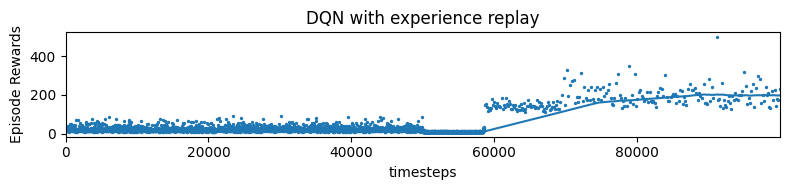

In [ ]:
batch_size = 64
lr = 1e-4
gamma = 0.8

env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
log_dir = "/tmp/exp_replay/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, filename=log_dir)

dqn_exp = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    target_update_interval=batch_size,  # disable target network
    verbose=1,  # show information throughout training
)

total_timesteps = 100000

dqn_exp.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(dqn_exp)))
plot_results([log_dir], total_timesteps, "timesteps", "DQN with experience replay")
results = load_results(log_dir)
print(f"Max reward: {results.r.max()}")


Jak widać rezultaty są dużo lepsze. Ale może udałoby się poprawić proces trenowania? Tego dotyczyć będą zadania.


## Zadanie 1

Zbadaj wpływ pozostałych ze wspomnianych hipeparametrów na trenowanie i działanie modelu. Skup się na zmianie architektury modelu strategii, hiperparametrach trenowania (gamma, epsilon itp.). Zapisz swoje wnioski oraz przygotuj wizualizacje uzyskiwanych rezultatów oraz animacje działania modelu.


In [ ]:
def train_model(gamma=0.8, lr=1e-4, policy_kwargs=dict(net_arch=[64, 64]), eps = [0.1, 0.1]):
  batch_size = 64
  env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
  log_dir = "/tmp/exp_replay/"
  os.makedirs(log_dir, exist_ok=True)
  env = Monitor(env, filename=log_dir)

  dqn_exp = DQN(
      MlpPolicy, env, policy_kwargs=policy_kwargs,
      learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
      target_update_interval=batch_size,  # disable target network
      exploration_fraction=1, exploration_initial_eps=eps[0], exploration_final_eps=eps[1],
      verbose=0,  # show information throughout training
  )


  total_timesteps = 100000

  dqn_exp.learn(total_timesteps)
  results = load_results(log_dir)
  print(f"Max reward: {results.r.max()}")

  return results.r.max()

In [ ]:
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lrs_r = [train_model(lr=lr) for lr in lrs]

gammas = np.arange(0, 1, 0.1)
gammas_r = [train_model(gamma=gamma) for gamma in gammas]

policy_kwargs = [dict(net_arch=[32, 32]), dict(net_arch=[64, 32, 16]), dict(net_arch=[128, 64, 32, 16])]
archi_r = [train_model(policy_kwargs=kwa) for kwa in policy_kwargs]

epses = [[0.1, 0.3], [0.1, 0.7], [0.1, 1]]
epses_r = [train_model(eps=eps) for eps in epses]

Max reward: 90.0
Max reward: 90.0
Max reward: 404.0
Max reward: 333.0
Max reward: 486.0
Max reward: 121.0
Max reward: 166.0
Max reward: 420.0
Max reward: 205.0
Max reward: 308.0
Max reward: 444.0
Max reward: 500.0
Max reward: 495.0
Max reward: 404.0
Max reward: 90.0
Max reward: 453.0
Max reward: 500.0
Max reward: 500.0
Max reward: 330.0
Max reward: 289.0
Max reward: 209.0


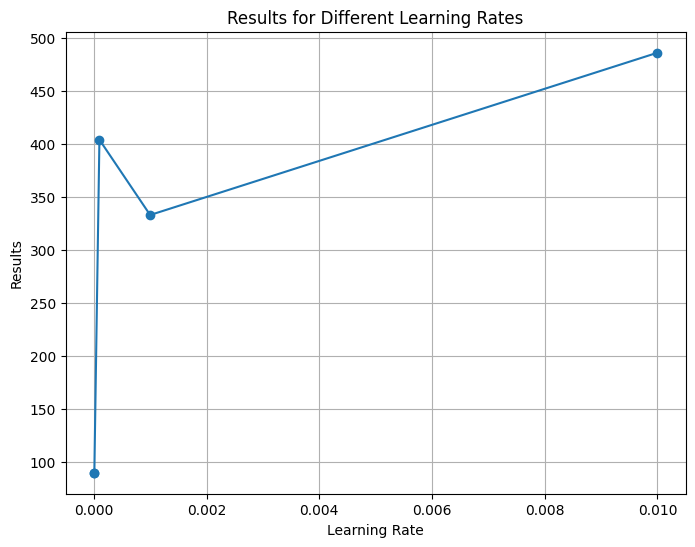

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(lrs, lrs_r, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Results')
plt.title('Results for Different Learning Rates')
plt.grid(True)
plt.show()

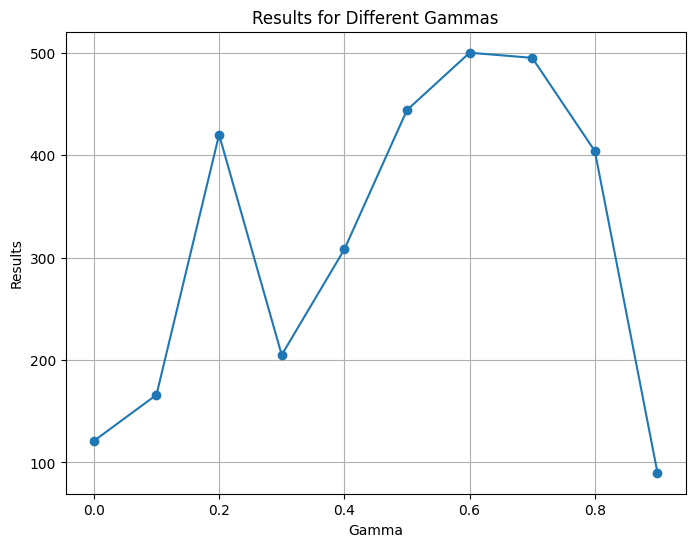

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(gammas, gammas_r, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Results')
plt.title('Results for Different Gammas')
plt.grid(True)
plt.show()


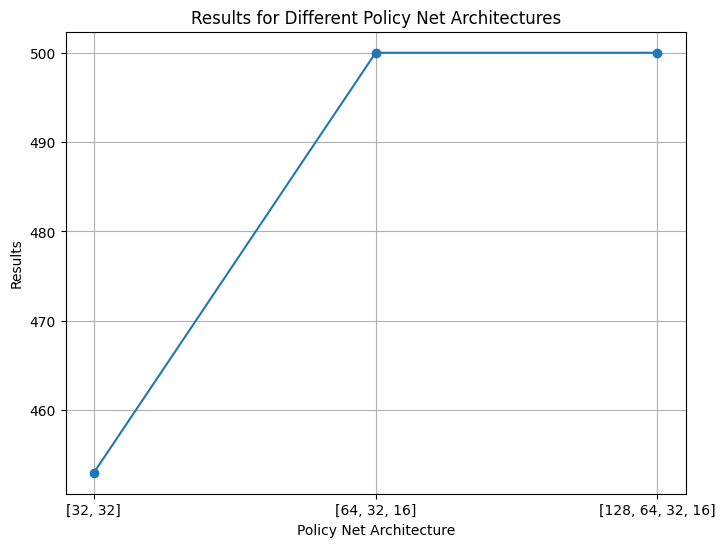

In [ ]:
archi_names = ['[32, 32]', '[64, 32, 16]', '[128, 64, 32, 16]']
plt.figure(figsize=(8, 6))
plt.plot(archi_names, archi_r, marker='o')
plt.xlabel('Policy Net Architecture')
plt.ylabel('Results')
plt.title('Results for Different Policy Net Architectures')
plt.grid(True)
plt.show()

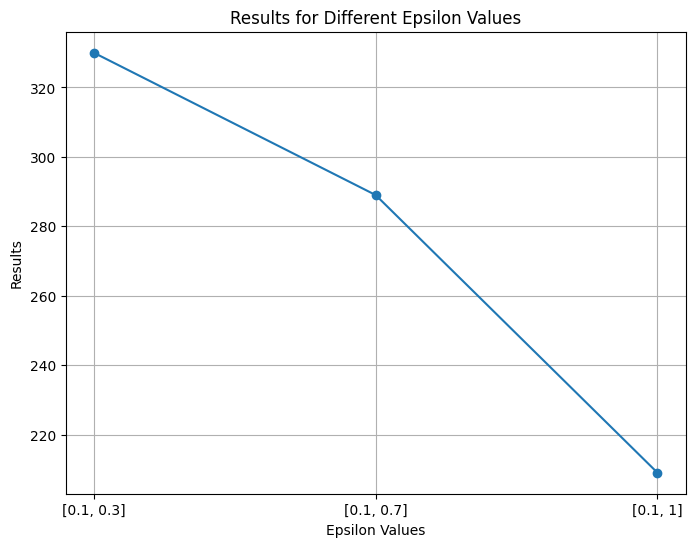

In [ ]:
eps_names = ['[0.1, 0.3]', '[0.1, 0.7]', '[0.1, 1]']
plt.figure(figsize=(8, 6))
plt.plot(eps_names, epses_r, marker='o')
plt.xlabel('Epsilon Values')
plt.ylabel('Results')
plt.title('Results for Different Epsilon Values')
plt.grid(True)
plt.show()

Reward in episode: 236.35 +/- 62.07


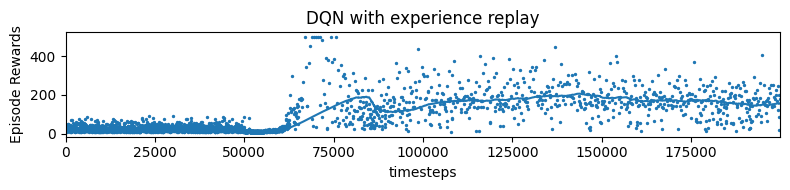

Max reward: 500.0


In [ ]:

gamma=0.6
lr=1e-4
policy_kwargs=dict(net_arch=[64, 32, 16])
eps = [0.1, 0.3]

batch_size = 64
env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
log_dir = "/tmp/exp_replay/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, filename=log_dir)

dqn_exp = DQN(
    MlpPolicy, env, policy_kwargs=policy_kwargs,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    target_update_interval=batch_size,  # disable target network
    exploration_fraction=1, exploration_initial_eps=eps[0], exploration_final_eps=eps[1],
    verbose=0,  # show information throughout training
)


total_timesteps = 200000


dqn_exp.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(dqn_exp)))
plot_results([log_dir], total_timesteps, "timesteps", "DQN with experience replay")
plt.show()
results = load_results(log_dir)
print(f"Max reward: {results.r.max()}")

## Zadanie 2

Wykorzystaj metodę Deep Q-Learning do przygotowania agenta działającego w wybranym innym środowisku z biblioteki [Gym](https://gym.openai.com/envs). Ze względu na cechy modelu zwróć uwagę na dopasowanie środowiska (np. przestrzeń akcji powinna być dyskretna). Zapoznaj się z definicją funkcji nagrody przyznawanej agentowi w środowisku, aby można było zinterpretować rezultaty osiągane przez model. Jeśli zdecydujesz się na wykorzystanie środowiska z obserwacjami wizualnymi, pamiętaj o zmianie typu modelu strategii (uwaga: trenowanie modeli w oparciu o obserwacje wizualne z wykorzystaniem sieci konwolucyjnym jest długotrwałe i może być bardziej niestabilne niż w przypadku strategii MLP). Spróbuj dostroić hiperparametry trenowania do nowego środowiska.


**acrobot**

apply -1 torque to the actuated joint

torque (N m)

1

apply 0 torque to the actuated joint

torque (N m)

2

apply 1 torque to the actuated joint

torque (N m)



In [ ]:
def train_model(gamma=0.98, lr=0.00043, policy_kwargs=dict(net_arch=[256, 256]), eps = [0.1, 0.13]):
  batch_size = 128
  env = gymnasium.make('Acrobot-v1', render_mode="rgb_array")
  log_dir = "/tmp/exp_replay/"
  os.makedirs(log_dir, exist_ok=True)
  env = Monitor(env, filename=log_dir)

  dqn_exp = DQN(
      MlpPolicy, env, policy_kwargs=policy_kwargs,
      learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
      target_update_interval=batch_size,
      exploration_fraction=1, exploration_initial_eps=eps[0], exploration_final_eps=eps[1],
      verbose=0,
  )


  total_timesteps = 170000

  dqn_exp.learn(total_timesteps)
  # display(ipythondisplay.HTML(visualize_model(dqn_exp, max_steps=300)))
  plot_results([log_dir], total_timesteps, "timesteps", "DQN with experience replay")
  plt.show()
  results = load_results(log_dir)
  print(f"Max reward: {results.r.max()}")

  return results.r.max()
  # return dqn_exp

Reward in episode: -80.24 +/- 17.63


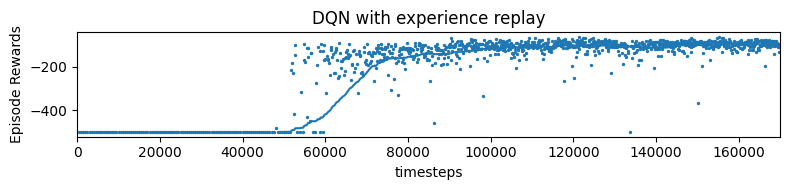

Max reward: -61.0


In [ ]:
model_dqn = train_model()

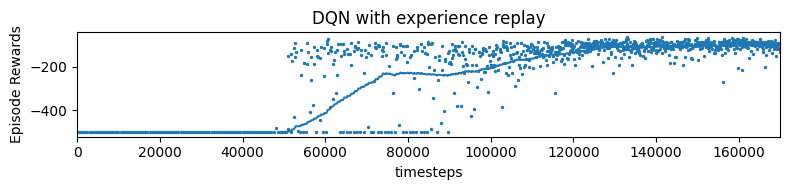

Max reward: -62.0


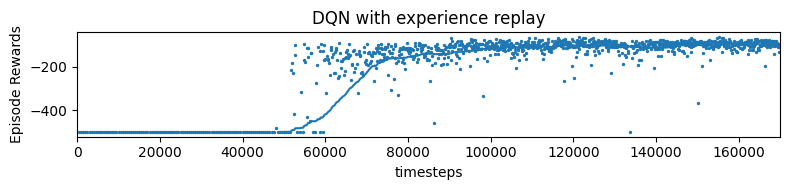

Max reward: -62.0


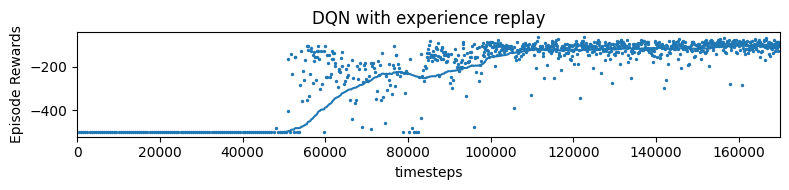

Max reward: -62.0


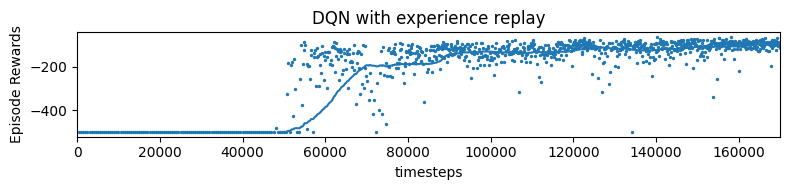

Max reward: -63.0


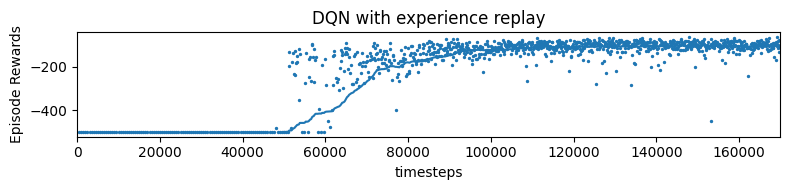

Max reward: -62.0


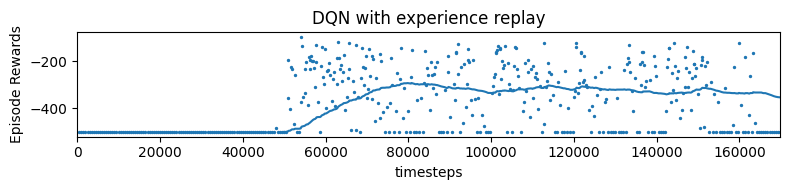

Max reward: -98.0


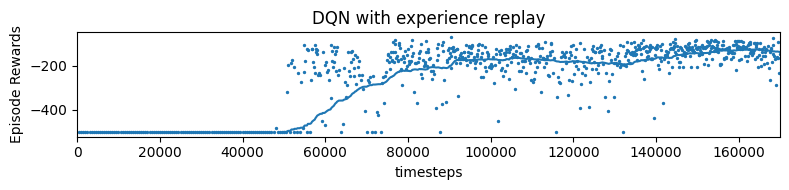

Max reward: -69.0


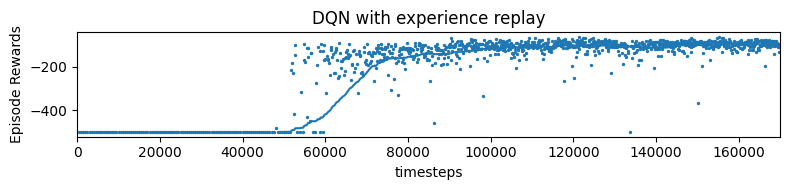

Max reward: -62.0


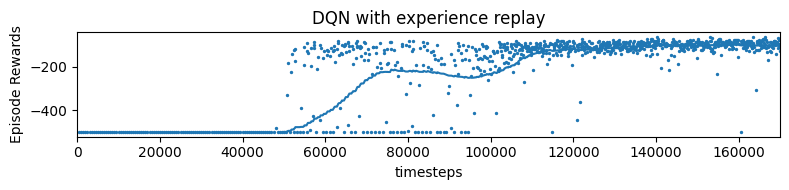

Max reward: -62.0


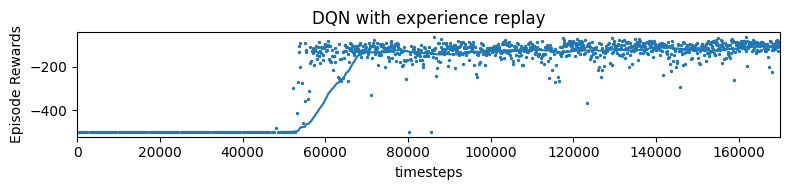

Max reward: -62.0


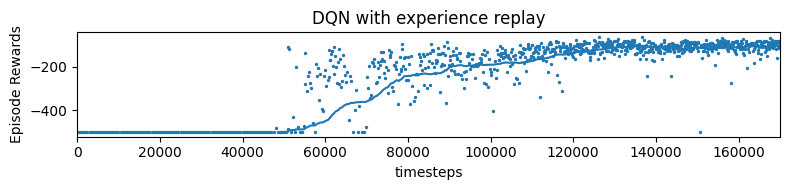

Max reward: -64.0


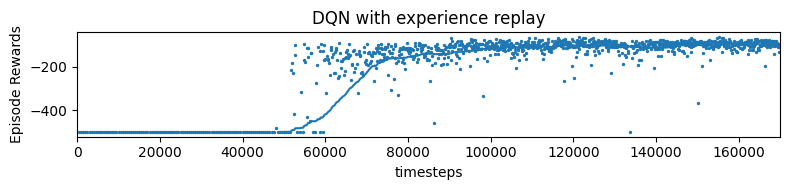

Max reward: -62.0


KeyboardInterrupt: ignored

In [ ]:
lrs = [0.0004, 0.00043, 0.00045, 0.0005, 0.0003]
lrs_r = [train_model(lr=lr) for lr in lrs]

gammas = [0.93, 0.96, 0.98, 0.99]
gammas_r = [train_model(gamma=gamma) for gamma in gammas]

policy_kwargs = [dict(net_arch=[128, 128]), dict(net_arch=[128, 128, 256]), dict(net_arch=[256, 256])]
archi_r = [train_model(policy_kwargs=kwa) for kwa in policy_kwargs]

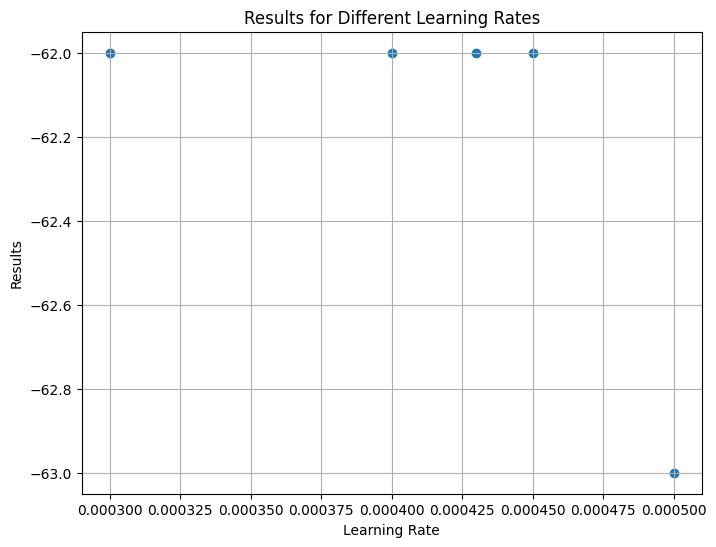

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(lrs, lrs_r, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Results')
plt.title('Results for Different Learning Rates')
plt.grid(True)
plt.show()

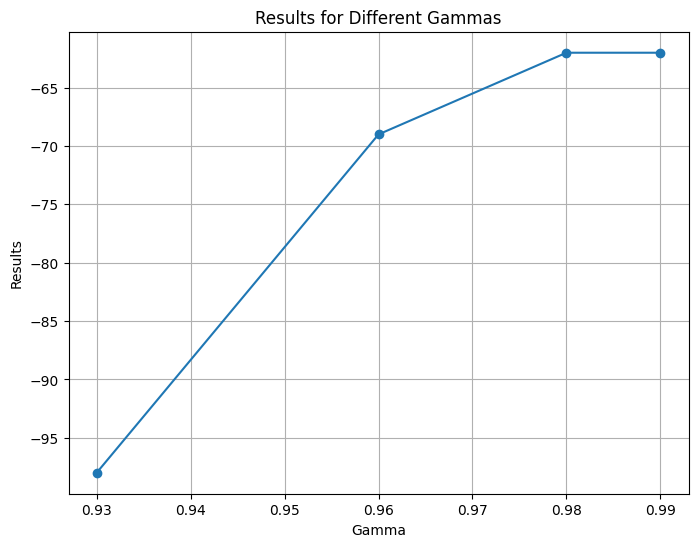

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(gammas, gammas_r, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Results')
plt.title('Results for Different Gammas')
plt.grid(True)
plt.show()


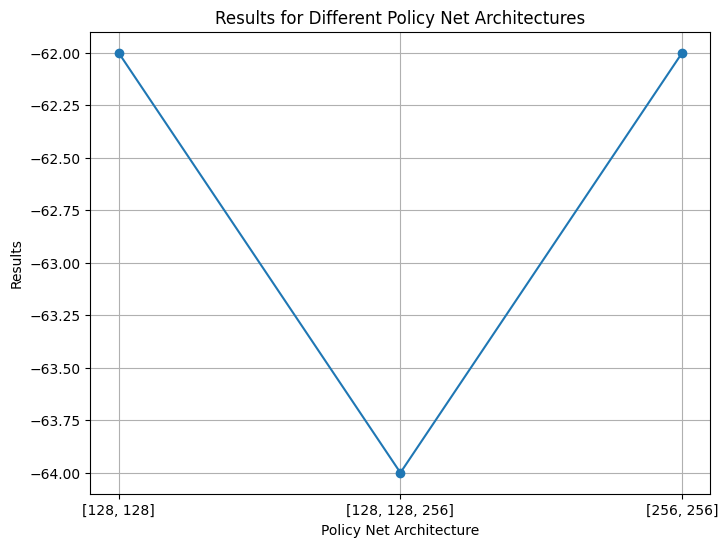

In [ ]:
archi_names = ['[128, 128]', '[128, 128, 256]', '[256, 256]']
plt.figure(figsize=(8, 6))
plt.plot(archi_names, archi_r, marker='o')
plt.xlabel('Policy Net Architecture')
plt.ylabel('Results')
plt.title('Results for Different Policy Net Architectures')
plt.grid(True)
plt.show()

In [ ]:
epses = [[0.1, 0.11], [0.1, 0.12], [0.12, 0.15]]
epses_r = [train_model(eps=eps) for eps in epses]

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(epses, epses_r, marker='o')
plt.xlabel('Epsilon Values')
plt.ylabel('Results')
plt.title('Results for Different Epsilon Values')
plt.grid(True)
plt.show()